# 初始UC公共样本菌群丰度和代谢物丰度相关性

(207, 31) (207, 21) (207, 1)


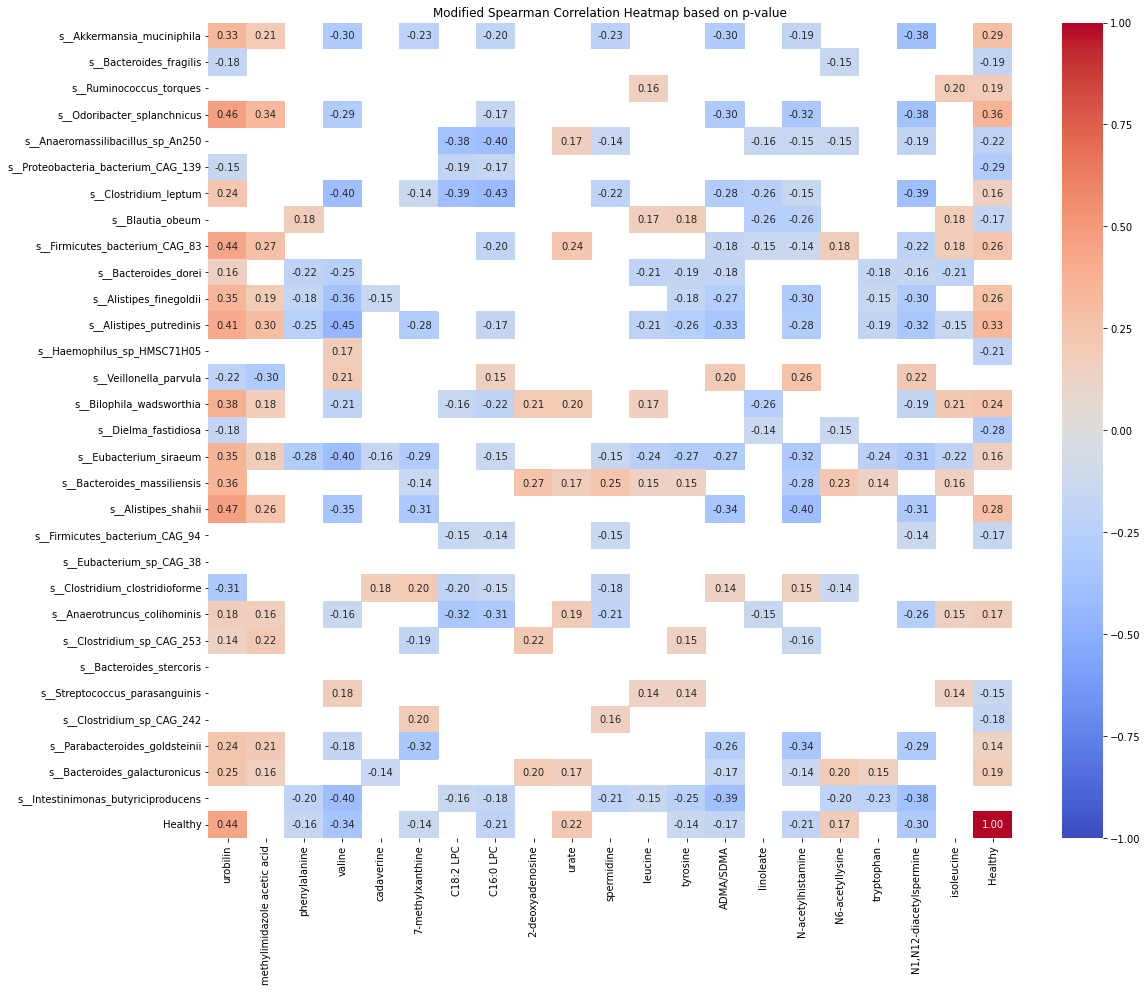

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 加载CSV文件
mg = pd.read_csv('metagenomics_select.csv', index_col=0)
mb = pd.read_csv('metabolomics_select.csv', index_col=0).fillna(0)
co_UC_shap_values = pd.read_csv('co_UC_shap_values.csv', index_col=0)
meta_data=pd.read_csv('meta.csv',index_col=0)
data_class={'nonIBD':1,'UC':0}#仅限相关性分析，将健康人定为1疾病定位0，以此表示特征与健康之间正负相关性
meta_data['diagnosis']=meta_data['diagnosis'].map(data_class)
meta_data.rename(columns={"diagnosis": "Healthy"}, inplace=True)

index_new = co_UC_shap_values.index

# 提取公共样本
mg_features = mg.reindex(index_new)
mb_features = mb.reindex(index_new)
meta_data=meta_data.reindex(index_new)

# 获取新列名的列表
new_mg_names = ['s' + col.split('|s', 1)[1] for col in mg_features.columns]

# 重命名列名
mg_features.columns = new_mg_names

#将标签列加入相关性分析
mg_features = pd.concat([mg_features, meta_data], axis=1)
mb_features = pd.concat([mb_features, meta_data], axis=1)
print(mg_features.shape,mb_features.shape,meta_data.shape)

# 初始化相关性系数矩阵
num_mg_features = len(mg_features.columns)
num_mb_features = len(mb_features.columns)
correlation_matrix_spearman = np.zeros((num_mg_features, num_mb_features))
p_value_matrix_spearman = np.zeros((num_mg_features, num_mb_features))

# 计算不同相关性系数
for i, feature1 in enumerate(mg_features.columns):
    for j, feature2 in enumerate(mb_features.columns):
        correlation_spearman, p_value_spearman = stats.spearmanr(mg_features[feature1], mb_features[feature2])
        correlation_matrix_spearman[i, j] = correlation_spearman
        p_value_matrix_spearman[i, j] = p_value_spearman

# 设置p值阈值，例如，p值小于0.05
p_value_threshold = 0.05

# 根据p值修改热力图颜色块
correlation_matrix_modified = np.where(p_value_matrix_spearman < p_value_threshold, correlation_matrix_spearman, np.nan)

# Create a heatmap with modified colors based on p-value
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_modified, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=mb_features.columns, yticklabels=mg_features.columns,vmin=-1,vmax=1)
plt.title('Modified Spearman Correlation Heatmap based on p-value')
plt.show()

<Figure size 1296x864 with 0 Axes>

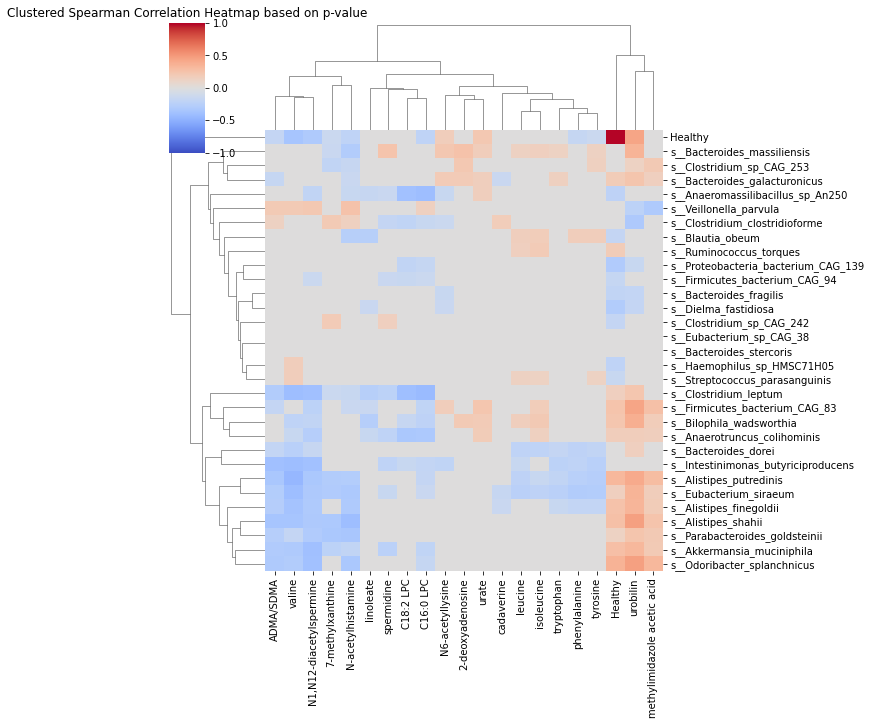

In [2]:
# 将NaN值替换为一个正数（例如0）
correlation_matrix_modified[np.isnan(correlation_matrix_modified)] = 0

# 绘制聚类图
plt.figure(figsize=(18, 12))
sns.clustermap(correlation_matrix_modified, cmap='coolwarm', xticklabels=mb_features.columns, yticklabels=mg_features.columns,vmin=-1,vmax=1)
plt.title('Clustered Spearman Correlation Heatmap based on p-value')
plt.show()

# 结合SHAP与相关性

In [3]:
UC_SHAP_correlation_matrix_modified = pd.read_csv('UC_SHAP_correlation_matrix_modified.csv', index_col = 0)
abundance_correlation_matrix_modified = np.where(p_value_matrix_spearman < p_value_threshold, correlation_matrix_spearman, np.nan)
#combined_correlation_matrix_modified = np.add(UC_SHAP_correlation_matrix_modified.values, abundance_correlation_matrix_modified)
combined_correlation_matrix_modified = np.add(np.nan_to_num(UC_SHAP_correlation_matrix_modified.values, nan = 0), np.nan_to_num(abundance_correlation_matrix_modified, nan = 0))
combined_correlation_matrix_modified[combined_correlation_matrix_modified == 0] = np.nan

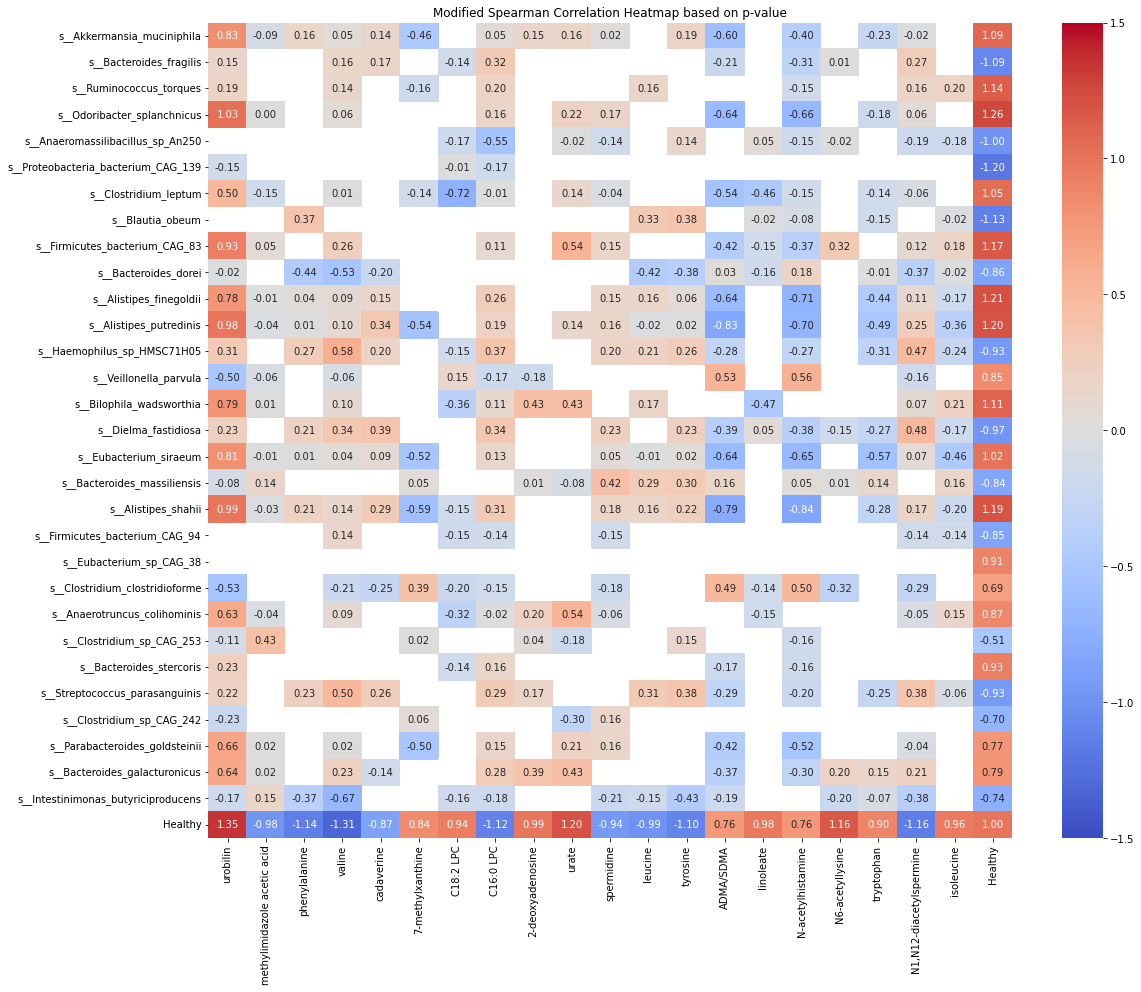

In [4]:
# Create a heatmap with modified colors based on p-value
plt.figure(figsize=(18, 15))
sns.heatmap(combined_correlation_matrix_modified, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=mb_features.columns, yticklabels=mg_features.columns,vmin=-1.5,vmax=1.5)
plt.title('Modified Spearman Correlation Heatmap based on p-value')
plt.show()

<Figure size 1296x864 with 0 Axes>

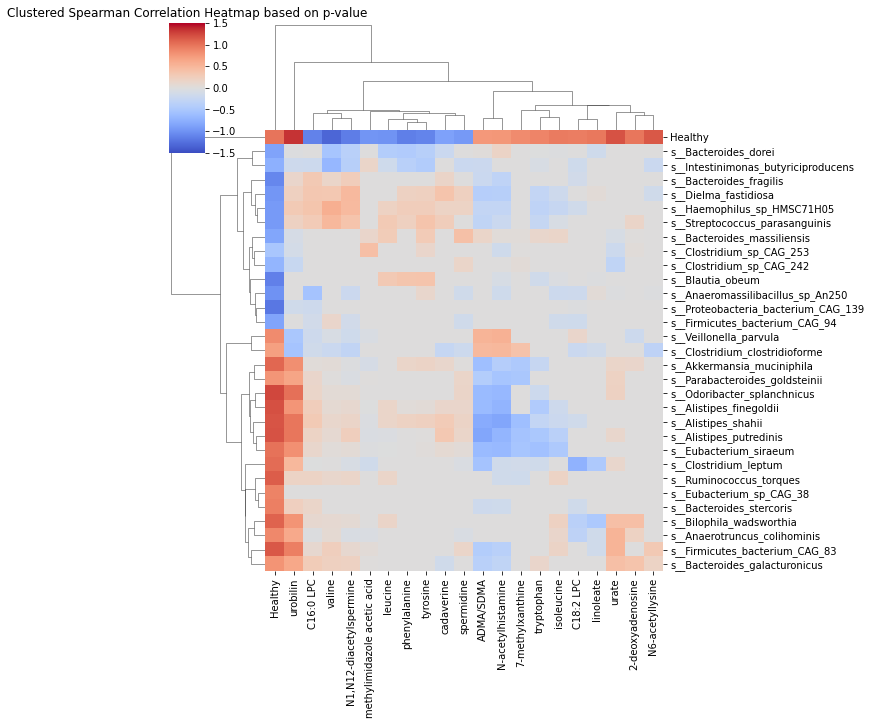

In [5]:
# 将NaN值替换为一个正数（例如0）
combined_correlation_matrix_modified[np.isnan(combined_correlation_matrix_modified)] = 0

# 绘制聚类图
plt.figure(figsize=(18, 12))
sns.clustermap(combined_correlation_matrix_modified, cmap='coolwarm', xticklabels=mb_features.columns, yticklabels=mg_features.columns,vmin=-1.5,vmax=1.5)
plt.title('Clustered Spearman Correlation Heatmap based on p-value')
plt.show()